In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
fig = plt.figure(figsize =(10, 7))

<Figure size 1000x700 with 0 Axes>

In [2]:
# https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
df = pd.read_csv(r'C:\dick_D\maga\1_kurs\Data-Analysis\1\dataset\creditcard_2023.csv', encoding='unicode_escape')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [3]:
print("Кількість нанів:\n", df.isnull().sum().sum())

Кількість нанів:
 0


In [4]:
print(f"Кількість рядків: {len(df)}")
print(df.columns)
print(f"Кількість рядків, де Class = 1: {(df['Class'] == 1).sum()}")
print(f"Кількість рядків, де Class = 0: {(df['Class'] == 0).sum()}")

Кількість рядків: 568630
Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Кількість рядків, де Class = 1: 284315
Кількість рядків, де Class = 0: 284315


In [5]:
df=df.drop(columns='id')

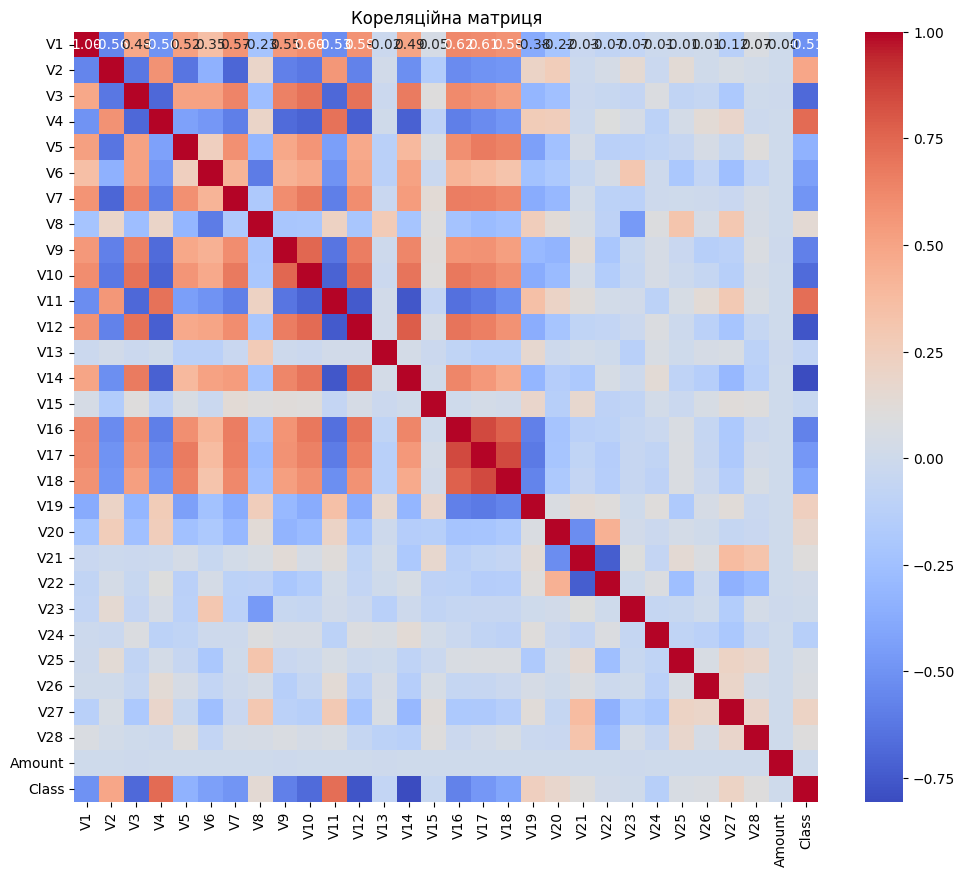

In [6]:
corr_matrix = df.corr()
class_corr = corr_matrix['Class'].drop('Class')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

In [7]:
class_corr_abs = class_corr.abs()
print("\nКореляція по модулю для кожної колонки з 'Class':")
print(class_corr_abs.sort_values(ascending=False))


Кореляція по модулю для кожної колонки з 'Class':
V14       0.805669
V12       0.768579
V4        0.735981
V11       0.724278
V3        0.682095
V10       0.673665
V9        0.585522
V16       0.573511
V1        0.505761
V2        0.491878
V7        0.491234
V17       0.476377
V6        0.435088
V18       0.410091
V5        0.338639
V19       0.244081
V27       0.214002
V20       0.179851
V8        0.144294
V24       0.130107
V21       0.109640
V28       0.102024
V13       0.071105
V26       0.071052
V25       0.061847
V15       0.037948
V22       0.014098
V23       0.010255
Amount    0.002261
Name: Class, dtype: float64


In [8]:
corr = 0.6
selected_features = class_corr_abs[class_corr_abs >= corr].index.tolist()
print(f"Вибрані колонки з кореляцією >= {corr}:")
print(selected_features)
print(f'Кількість фічь: {len(selected_features)}')

Вибрані колонки з кореляцією >= 0.6:
['V3', 'V4', 'V10', 'V11', 'V12', 'V14']
Кількість фічь: 6


In [9]:
selected_features.append('Class')
df_work = df[selected_features]
df_work

,V3,V4,V10,V11,V12,V14,Class
0,2.496266,-0.083724,0.637735,-0.987020,0.293438,0.549020,0
1,0.558056,-0.429654,0.529808,0.140107,1.564246,0.627719,0
2,1.728538,-0.457986,0.690708,-0.272985,0.659201,0.616874,0
3,1.746840,-1.090178,0.575231,-0.752581,0.737483,0.559535,0
4,1.527053,-0.448293,0.968046,-1.203171,1.029577,0.241454,0
...,...,...,...,...,...,...,...
568625,-0.899794,0.904227,-1.161847,1.430971,-1.330500,-1.363454,1
568626,-0.068129,-0.267328,-0.210817,0.173590,-0.539948,-0.812043,1
568627,0.137526,-0.035893,-0.144495,0.477582,-0.461849,-0.395126,1
568628,-0.300889,-0.144480,-0.080078,-0.324934,0.335215,-0.390369,1


In [10]:
class_0 = df_work[df_work['Class'] == 0]
class_1 = df_work[df_work['Class'] == 1]
len_c = 10000
if len(class_0) > len_c:
    class_0 = class_0.sample(n=len_c, random_state=42)
if len(class_1) > len_c:
    class_1 = class_1.sample(n=len_c, random_state=42)

balanced_df = pd.concat([class_0, class_1])
df_work = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

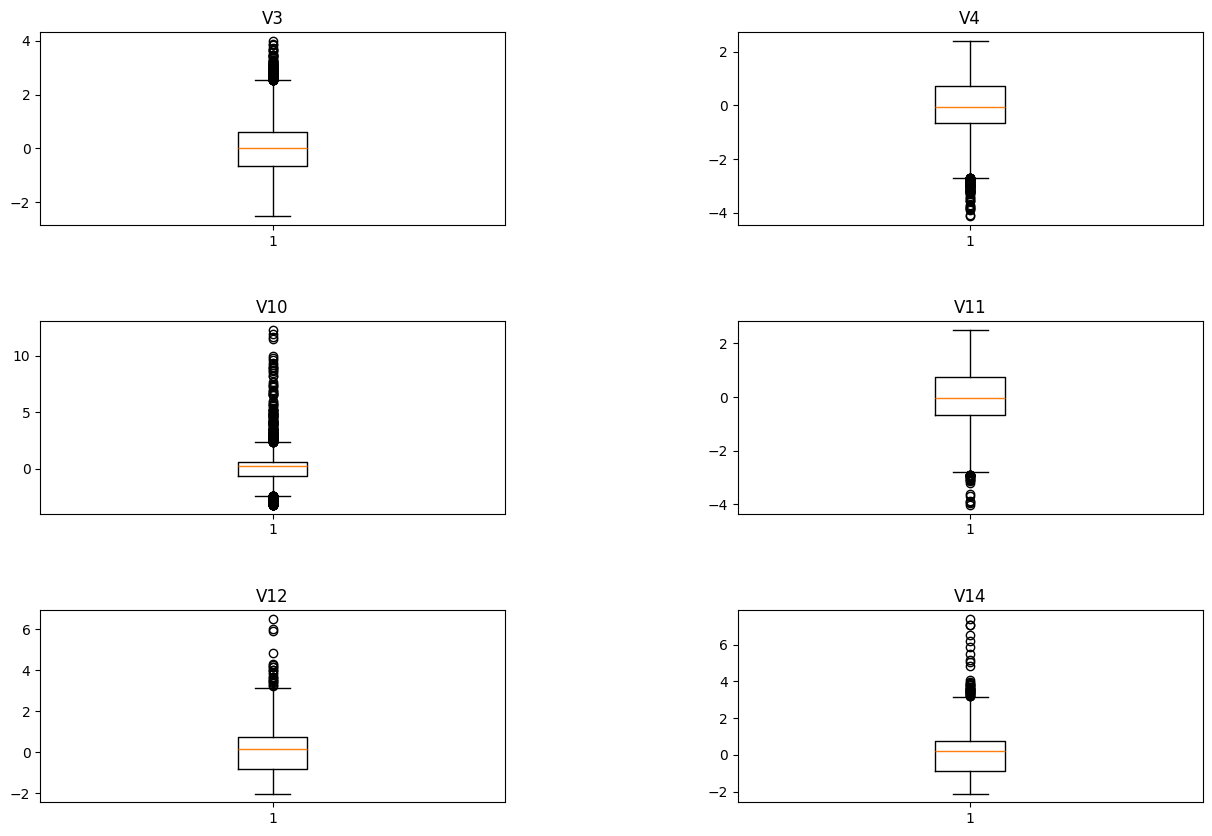

In [11]:
def iterboxplot(df,date, fig=(15,10)):
    fig, axes = plt.subplots(3, 2, figsize=fig)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    for i, (col, ax) in enumerate(zip(df[date], axes.flatten())):
        ax.boxplot(df[col])
        ax.set_title(col)

iterboxplot(df_work, df_work.columns)

In [12]:
Q1 = df_work.quantile(0.25)
Q3 = df_work.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_work = df_work[(df_work >= lower_bound) & (df_work <= upper_bound)].dropna()
df_work

,V3,V4,V10,V11,V12,V14,Class
0,-0.032631,0.456084,-0.306417,0.885170,-0.781245,-0.745441,1
1,0.096435,-0.903140,0.621254,-0.748071,0.361329,-0.066060,0
2,0.388537,-0.772716,0.361861,-0.997131,0.403704,0.251183,0
3,0.497243,-0.682775,0.889316,-1.248013,0.447700,0.754524,0
4,-0.067848,0.365747,-0.402988,0.083672,-0.350951,-0.603288,1
...,...,...,...,...,...,...,...
19995,-0.341136,0.766461,-0.123128,0.308819,-0.303944,-0.961752,1
19996,0.359912,0.434603,0.337878,-0.281315,-0.458435,0.390224,1
19997,2.276791,0.037525,0.328211,-1.607300,0.799576,0.413217,0
19998,1.346685,-0.519964,0.559298,-0.297928,1.497091,0.570311,0


In [13]:
print(f"Кількість рядків: {len(df_work)}")
print(df_work.columns)
print(f"Кількість рядків, де Class = 1: {(df_work['Class'] == 1).sum()}")
print(f"Кількість рядків, де Class = 0: {(df_work['Class'] == 0).sum()}")

Кількість рядків: 19322
Index(['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'Class'], dtype='object')
Кількість рядків, де Class = 1: 9756
Кількість рядків, де Class = 0: 9566


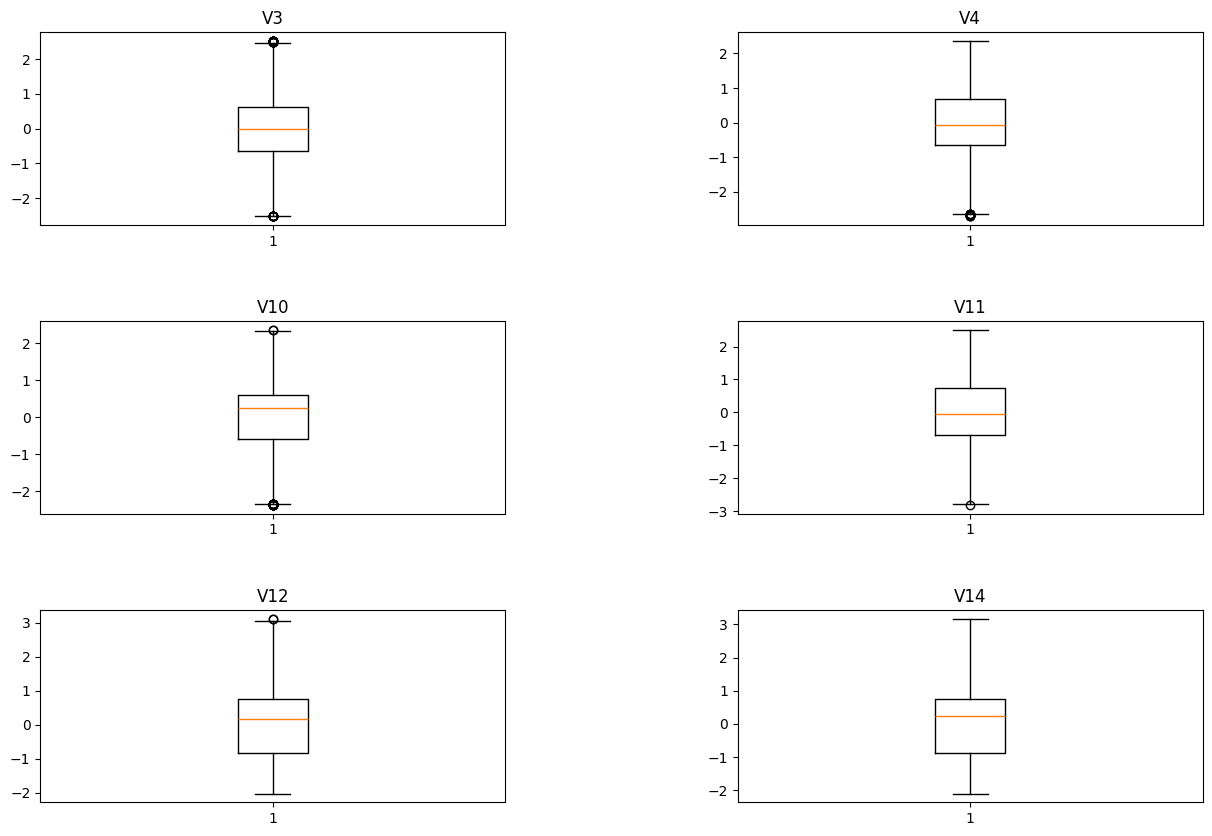

In [14]:
iterboxplot(df_work, df_work.columns)

In [15]:
columns_to_normalize = df_work.columns.difference(['Class'])
scaler = MinMaxScaler()
df_work[columns_to_normalize] = scaler.fit_transform(df_work[columns_to_normalize])

In [16]:
X = df_work.drop('Class', axis=1)
y = df_work['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [17]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': list(range(1, 10))}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

print(f"Оптимальне значення для kNN: {grid_knn.best_params_}")

Оптимальне значення для kNN: {'n_neighbors': 1}


In [18]:
knn_best = grid_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)

print("kNN Classification Report")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix for kNN:")
print(confusion_matrix(y_test, y_pred_knn))

kNN Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2866
           1       0.98      0.98      0.98      2931

    accuracy                           0.98      5797
   macro avg       0.98      0.98      0.98      5797
weighted avg       0.98      0.98      0.98      5797

Confusion Matrix for kNN:
[[2808   58]
 [  54 2877]]


In [19]:
dt = DecisionTreeClassifier(random_state=5)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2866
           1       0.96      0.97      0.97      2931

    accuracy                           0.97      5797
   macro avg       0.97      0.97      0.97      5797
weighted avg       0.97      0.97      0.97      5797

Confusion Matrix for Decision Tree:
[[2755  111]
 [  84 2847]]


In [20]:
svm = SVC()
param_grid_svm = {
    'C': [0.1, 1, 0.01],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 0.01], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']})

In [21]:
print(f"Найкращі параметри для SVM: {grid_svm.best_params_}")

Найкращі параметри для SVM: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [22]:
svm_best = grid_svm.best_estimator_

y_pred_svm = svm_best.predict(X_test)

print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2866
           1       0.98      0.94      0.96      2931

    accuracy                           0.96      5797
   macro avg       0.96      0.96      0.96      5797
weighted avg       0.96      0.96      0.96      5797

Confusion Matrix for SVM:
[[2814   52]
 [ 189 2742]]


In [23]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2866
           1       0.99      0.97      0.98      2931

    accuracy                           0.98      5797
   macro avg       0.98      0.98      0.98      5797
weighted avg       0.98      0.98      0.98      5797

Confusion Matrix for Random Forest:
[[2824   42]
 [  95 2836]]


In [24]:
ada = AdaBoostClassifier(random_state=5)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

print("AdaBoost Classification Report")
print(classification_report(y_test, y_pred_ada))
print("Confusion Matrix for AdaBoost:")
print(confusion_matrix(y_test, y_pred_ada))

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2866
           1       0.97      0.95      0.96      2931

    accuracy                           0.96      5797
   macro avg       0.96      0.96      0.96      5797
weighted avg       0.96      0.96      0.96      5797

Confusion Matrix for AdaBoost:
[[2789   77]
 [ 148 2783]]
